# Proyecto 1. Pandas
Con el fichero Fichero `sample_NYC_parking_issues.csv`


**Importante:** los cambios se arrastran en las siguientes preguntas.


### Crea un proyecto en Github para esta entrega e incluye un fichero Readme.md
Asegurate que es público ya que solo se puede entregar la URL del proyecto en github.
<hr/>

Llorenç Capó Torres

### A) Limpia el dataframe de aquellas columnas con todos sus campos a NAN

In [1]:
import pandas as pd

In [6]:
parking = pd.read_csv("C:/Users/Llorenç/Documents/Tecnologias/EntregaPandasGit/ProyectoPandas/sample_NYC_parking_issues.csv", sep=";", header=0, index_col=0)
parking.head()

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
7192124,7684215310,24824MD,NY,COM,04/23/2014,71,VAN,FRIG,T,9540,...,WH,NaN,2004.0,NaN,0.0,01 4,71A-Insp Sticker Expired (NYS),NaN,NaN,NaN
1399831,5070680213,9TOPCLAS,NY,OMT,09/14/2013,7,4DSD,DODGE,V,0,...,BK,NaN,2008.0,NaN,0.0,NaN,FAILURE TO STOP AT RED LIGHT,NaN,NaN,NaN
5369188,1356951855,GEL1573,NY,PAS,02/13/2014,71,SUBN,HONDA,P,11710,...,NaN,0.0,2006.0,-,0.0,NaN,NaN,NaN,NaN,NaN
6338606,7713806271,EDU1026,NY,PAS,03/20/2014,21,SUBN,TOYOT,T,24440,...,GY,NaN,2008.0,NaN,0.0,14 4,21-No Parking (street clean),NaN,NaN,NaN
2823881,7645478044,DXX6460,NY,PAS,11/01/2013,20,4DSD,HONDA,T,54790,...,MR,NaN,1996.0,NaN,0.0,03-A,20A-No Parking (Non-COM),NaN,NaN,NaN


In [8]:
parking_cleaned = parking.dropna(axis=1, how="all")
len(parking_cleaned.columns) < len(parking.columns)

True

### B) Elimina todas las muestras donde la fecha no tenga coherencia: `Vehicle Year`, además transformalas a enteros (2024,2012,2006,etc.)

In [19]:
year_min = 1900
year_max = pd.Timestamp.now().year
parking_cleaned['Vehicle Year'] = parking_cleaned['Vehicle Year'].astype(int)

In [18]:
parking_cleaned = parking_cleaned[(parking_cleaned['Vehicle Year'] >= year_min) & (parking_cleaned['Vehicle Year'] <= year_max)]

In [22]:
parking_cleaned.shape[0] < parking.shape[0]

True

### C) Hay marcas de vehículos que no guardan sentido con ninguna marca real (`Vehicle Make`) elimina dichas muestras. Deja constancia de cuantas has borrado.

In [25]:
parking_cleaned["Vehicle Make"].unique()

array(['FRIG', 'DODGE', 'HONDA', 'TOYOT', 'VOLKS', 'INTER', 'FORD', 'GMC',
       'ME/BE', 'NISSA', 'CHEVR', 'INFIN', 'LEXUS', 'VOLVO', 'MERCU',
       'ACURA', 'NS/OT', 'BMW', 'PETER', 'LINCO', 'ISUZU', 'FRUEH',
       'CHRYS', 'CADIL', 'WORK', 'SUBAR', 'HYUND', 'SAAB', 'PREV',
       'PONTI', 'MITSU', 'ROVER', 'JEEP', 'MAZDA', 'LEXCO', 'WORKH',
       'PORSC', 'FREI', 'AUDI', 'MACK', 'HINO', 'KIA', 'KENWO', 'BENTL',
       'UTIL', 'JAGUA', 'SOLEC', nan, 'MI/F', 'MINI', 'BUICK', 'SATUR',
       'NAVIS', 'STARC', 'OLDSM', 'VAN H', 'SMITH', 'UD', 'PRATT',
       'FR/LI', 'CHEET', 'SMART', 'UTITY', 'PREVO', 'PLYMO', 'SUZUK',
       'HUMME', 'W', 'KAWAS', 'FIAT', 'FR/L', 'FR L', 'FRGHT', 'ICENE',
       'UTILI', 'WO/C', 'THD', 'VESPA', 'GEM', 'WHITE', 'CHECK', 'RNG R',
       'WANC', 'VOLU', 'LIMO', 'BL/B', 'KENW', 'KRYS', 'MCI', 'KW', 'SZI',
       'STAR', 'UPS', 'HERCU', 'GIDNY', 'SPRI', 'VL', 'WOR', 'AMC',
       'PUTEL', 'FRG'], dtype=object)

In [26]:
marcas_validas = {
    'DODGE', 'HONDA', 'TOYOTA', 'VOLKSWAGEN', 'FORD', 'GMC', 'NISSAN', 'CHEVROLET', 
    'INFINITI', 'LEXUS', 'VOLVO', 'MERCEDES-BENZ', 'ACURA', 'BMW', 'LINCOLN', 
    'ISUZU', 'CHRYSLER', 'CADILLAC', 'SUBARU', 'HYUNDAI', 'SAAB', 'PONTIAC', 
    'MITSUBISHI', 'LAND ROVER', 'JEEP', 'MAZDA', 'PORSCHE', 'AUDI', 'MACK', 
    'HINO', 'KIA', 'BENTLEY', 'JAGUAR', 'MINI', 'BUICK', 'SATURN', 'OLDSMOBILE', 
    'SUZUKI', 'HUMMER', 'FIAT', 'SMART', 'VESPA', 'WHITE', 'KENWORTH', 'FREIGHTLINER', 
    'INTERNATIONAL', 'WORKHORSE', 'UTILITY', 'NAVISTAR', 'STARCRAFT', 'GEM', 
    'SPRINTER', 'MERCURY', 'AMC', 'PLYMOUTH'
}

filas_originales = len(parking_cleaned)
parking_cleaned = parking_cleaned[parking_cleaned['Vehicle Make'].str.upper().isin(marcas_validas)]
filas_filtradas = len(parking_cleaned)
filas_eliminadas = filas_originales - filas_filtradas
print(f"Se eliminaron {filas_eliminadas} filas con marcas no válidas.")

Se eliminaron 3894 filas con marcas no válidas.


### D) Representa en un grafíco de barras la cantidad de vehículos (por marca `Vehicle Make`) 

In [27]:
import matplotlib.pyplot as plt

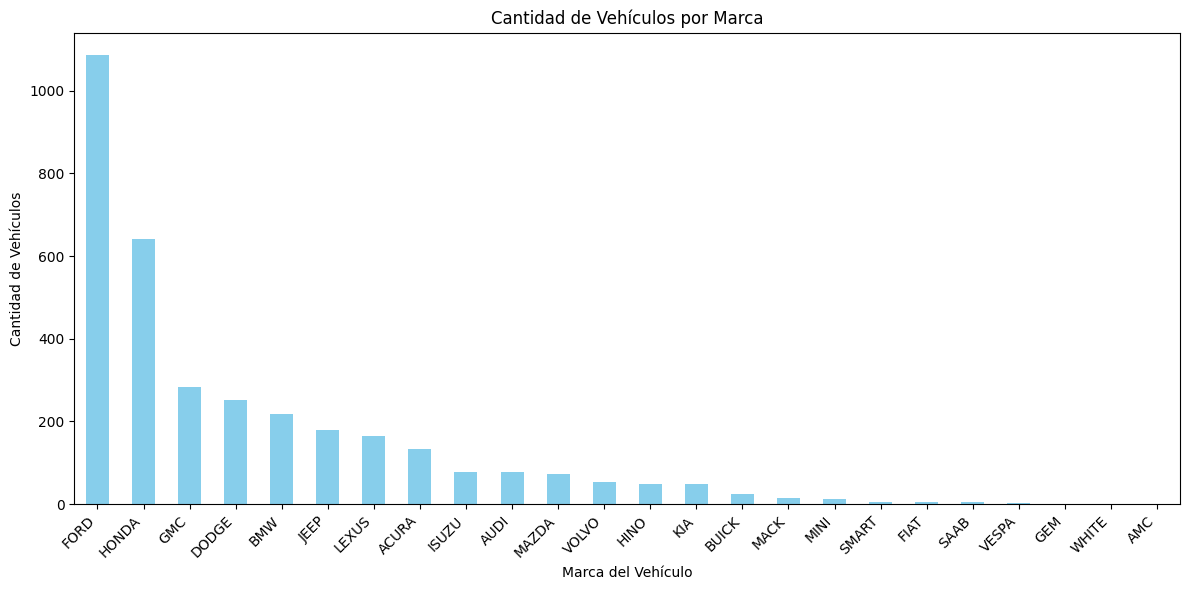

In [29]:
dicc_marcas = parking_cleaned['Vehicle Make'].value_counts()

plt.figure(figsize=(12, 6))
dicc_marcas.plot(kind='bar', color='skyblue')
plt.xlabel('Marca del Vehículo')
plt.ylabel('Cantidad de Vehículos')
plt.title('Cantidad de Vehículos por Marca')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### E) Unifica lo máximo que puedas la terminología de colores. Por ejemplo, valores como `WH` y `wh`y `wh\`hacen referencia al `white`

In [31]:
parking_cleaned["Vehicle Color"].unique()

array(['BK', nan, 'MR', 'RD', 'BR', 'TAN', 'WH', 'BLUE', 'GY', 'TN',
       'BROWN', 'YW', 'BLACK', 'WHITE', 'DKB', 'PR', 'BL', 'LTP', 'GREY',
       'GRN', 'WT', 'GR', 'SILV', 'SILVE', 'RED', 'GL', 'WHT', 'OTHER',
       'WTH', 'GRAY', 'SIL', 'YELLO', 'GREEN', 'ORANG', 'GOLD', 'GRY',
       'BLK', 'OR', 'YL', 'BEIGE', 'LTBL', 'WH-BL', 'LT/', 'WHR', 'GYW',
       'GY/', 'NOC', 'GN', 'SILVR', 'YEL', 'GYGY', 'DK/', 'BRN', 'DKR',
       'PURPL', 'BLGY', 'WHI', 'DKBL', 'WGUTE', 'RD/', 'BLG', 'DKG',
       'LTB', 'LTG', 'GYTN', 'GYBR', 'PUR', 'BKBR'], dtype=object)

In [35]:
# Diccionario de mapeo para unificar y simplificar colores
dicc_colores = {
    # Blancos
    'WH': 'WHITE', 'WHITE': 'WHITE', 'WHT': 'WHITE', 'WT': 'WHITE', 'WTH': 'WHITE', 
    'WHI': 'WHITE', 'BEIGE': 'WHITE', 'TAN': 'WHITE', 'TN': 'WHITE',
    
    # Negros
    'BK': 'BLACK', 'BLACK': 'BLACK', 'BLK': 'BLACK', 'BKBR': 'BLACK',  # BKBR → BLACK
    
    # Rojos
    'RD': 'RED', 'RED': 'RED', 'MAROON': 'BROWN', 'MR': 'BROWN', 'RD/': 'RED',  # RD/ → RED
    
    # Grises
    'GY': 'GRAY', 'GREY': 'GRAY', 'GRAY': 'GRAY', 'GRY': 'GRAY', 'SILV': 'GRAY', 
    'SILVE': 'GRAY', 'SIL': 'GRAY', 'SILVR': 'GRAY', 'SILVER': 'GRAY', 'LTP': 'GRAY',  # LTP → GRAY
    
    # Azules
    'BL': 'BLUE', 'BLUE': 'BLUE', 'LTBL': 'BLUE', 'DKB': 'BLUE', 'DKBL': 'BLUE', 
    'LTB': 'BLUE', 'BLGY': 'BLUE', 'BLG': 'BLUE', 'DKBL': 'BLUE', 'WH-BL': 'WHITE',  # WH-BL → WHITE
    
    # Marrones
    'BR': 'BROWN', 'BROWN': 'BROWN', 'BRN': 'BROWN', 'DKBR': 'BROWN',
    
    # Verdes
    'GR': 'GREEN', 'GREEN': 'GREEN', 'GRN': 'GREEN', 'LTG': 'GREEN', 'DKG': 'GREEN', 
    'GN': 'GREEN', 'GRY': 'GREEN', 'GYGY': 'GREEN',
    
    # Amarillos
    'YL': 'YELLOW', 'YELLO': 'YELLOW', 'YEL': 'YELLOW', 'GOLD': 'YELLOW', 'YW': 'YELLOW',  # YW → YELLOW
    
    # Naranjas
    'OR': 'ORANGE', 'ORANG': 'ORANGE', 'PR': 'ORANGE',  # PR → ORANGE
    
    # Morados
    'PURPL': 'PURPLE', 'PUR': 'PURPLE',
    
    # Otros
    'OTHER': 'OTHER', 'NOC': 'OTHER', 'GL': 'OTHER', 'GYW': 'OTHER', 'GYTN': 'OTHER', 
    'GYBR': 'OTHER', 'WGUTE': 'OTHER', 'LT/': 'OTHER', 'GY/': 'OTHER', 'DK/': 'OTHER', 
    'WHR': 'OTHER', 'DKR': 'RED',  # DKR como RED
}

parking_cleaned['Vehicle Color'] = (
    parking_cleaned['Vehicle Color']
    .fillna('OTHER')  # Reemplazar NaN con 'OTHER'
    .str.upper() 
    .replace(dicc_colores)
)
print("Valores únicos de colores después de la unificación:")
print(parking_cleaned['Vehicle Color'].unique())

Valores únicos de colores después de la unificación:
['BLACK' 'OTHER' 'BROWN' 'RED' 'WHITE' 'BLUE' 'GRAY' 'YELLOW' 'ORANGE'
 'GREEN' 'PURPLE']


### F) Representa en un gráfico de barras las marca de vehículo segmentadas por colores de vehículos.

<Figure size 1200x800 with 0 Axes>

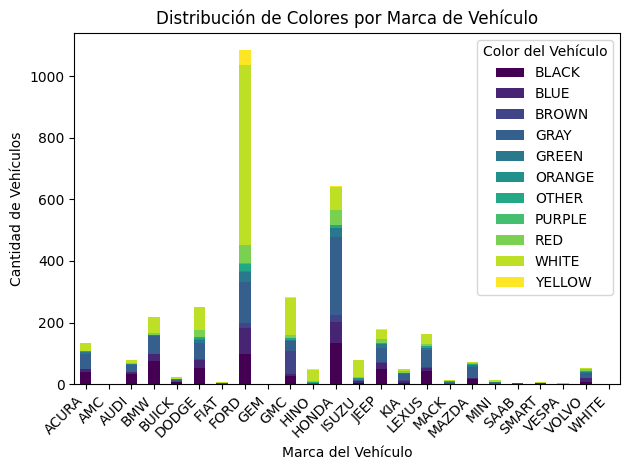

In [38]:
grouped_data = parking_cleaned.groupby(['Vehicle Make', 'Vehicle Color']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
grouped_data.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('Marca del Vehículo')
plt.ylabel('Cantidad de Vehículos')
plt.title('Distribución de Colores por Marca de Vehículo')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Color del Vehículo')
plt.tight_layout()
plt.show()

### H) Subé este código a tu repositorio. Incluye un documento Readme.md Indicando tan solo: "H"

### I) Convierte la serie `Issue Date` en una serie temporal y contabiliza las multas por `Violation Code[] y més del Issue Date.

In [48]:
parking_cleaned['Issue Date'] = pd.to_datetime(parking_cleaned['Issue Date'])
parking_cleaned['Month'] = parking_cleaned['Issue Date'].dt.month
multas_por_mes_y_codigo = (
    parking_cleaned
    .groupby(['Violation Code', 'Month'])
    .size()  # Contar ocurrencias
    .reset_index(name='Cantidad de Multas')  # Convertir a DataFrame
)
multas_por_mes_y_codigo.head()

,Violation Code,Month,Cantidad de Multas
0,5,1,9
1,5,2,9
2,5,3,15
3,5,6,1
4,5,7,2


### J) Visualiza la anterior cuestión (I)

In [50]:
import seaborn as sns

In [51]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=multas_por_mes_y_codigo, x='Month', y='Cantidad de Multas', hue='Violation Code', palette='viridis', marker='o')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Multas')
plt.title('Evolución de Multas por Violation Code y Mes')
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
plt.xticks(range(1, 13), meses)
plt.legend(title='Violation Code')
plt.tight_layout()
plt.show()

NameError: name 'multas_por_mes_y_codigo_filtrado' is not defined

<Figure size 1200x600 with 0 Axes>

### K) Subé este código a tu repositorio. Sustituye la 'H' del readme.md por un 'end'